# **Key Insights on Supply Chain for International e-commerce company**

---


An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.


**About The Dataset:**
The dataset used for model building contained 10,999 observations of 12 variables. The details as follows:- 

•	**ID**: ID Number of Customers.

•	**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E,F.

•	**Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.

•	**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

•	**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

•	**Cost of the product**: Cost of the Product in US Dollars.

•	**Prior purchases**: The Number of Prior Purchase.

•	**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

•	**Gender**: Male and Female.

•	**Discount offered**: Discount offered on that specific product.

•	**Weight in grams**: It is the weight in grams.

•	**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# **Problem Statements** 
1) What was Customer Rating? And was the product delivered on time?

2) Is Customer query is being answered?

3) If Product importance is high. having highest rating or being delivered on time?


### **Load and Overview of data**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler # for RobustScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

# read the train data
df = pd.read_csv('train.csv')
df 

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
# Check for datatypes 
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
# Check for the null values
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# Check for duplicates 
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Based on the checking above, we can conclude that the dataset do not have missing values and duplicate data. 

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
4436/6563

0.6759104068261466

========================
### **Data Visualisation**
========================

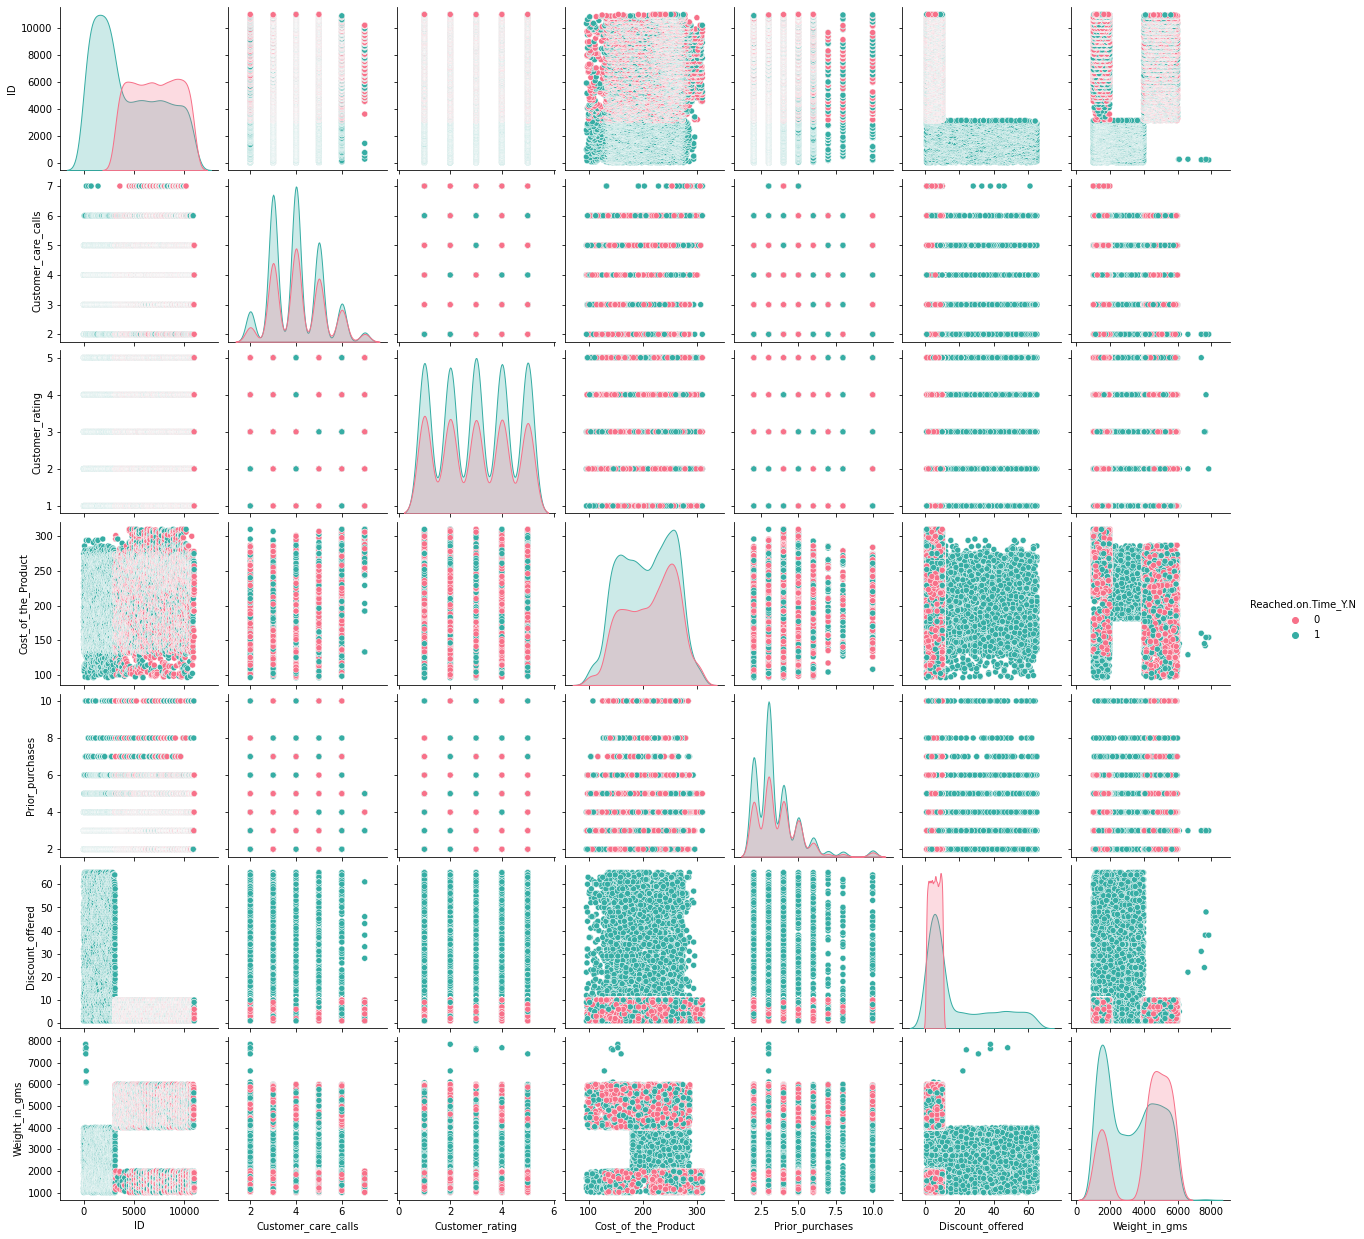

In [ ]:
g = sns.pairplot(df,hue="Reached.on.Time_Y.N", palette="husl")

**To perform EDA to answer the following questions:-**

**1) What was Customer Rating? And was the product delivered on time?**


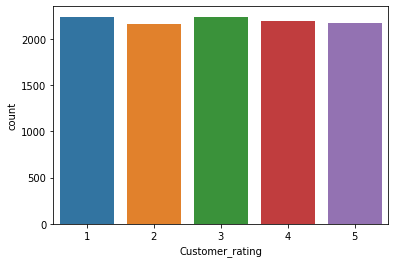

In [ ]:
# To plot number of Customer Rating with labels from 1 (Worst) to 5 (Best). 
sns.countplot(x = df['Customer_rating']);

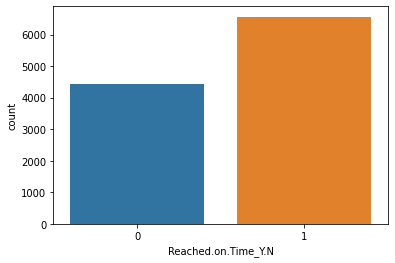

In [ ]:
# To plot number of Reached On Time where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
sns.countplot(x = df['Reached.on.Time_Y.N']);

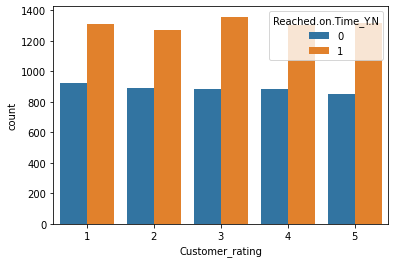

In [ ]:
# To plot Customer Rating versus Reached On Time
sns.countplot(x='Customer_rating',
              data=df, hue='Reached.on.Time_Y.N')

plt.show()

**2) Is Customer query is being answered?**

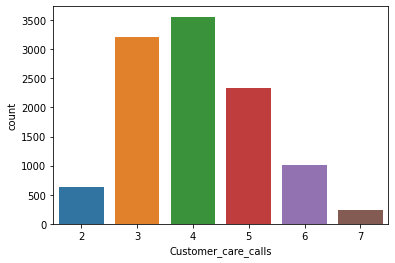

In [ ]:
sns.countplot(x = df['Customer_care_calls']);

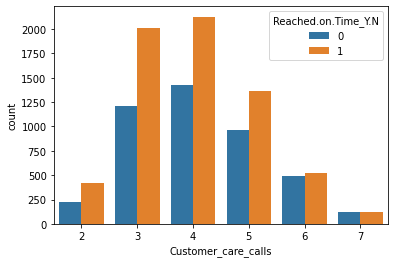

In [ ]:
# To plot Customer_care_calls versus Reached.on.Time_Y.N
sns.countplot(x='Customer_care_calls',
              data=df, hue='Reached.on.Time_Y.N')

plt.show()

**3) If Product importance is high. having highest rating or being delivered on time?**

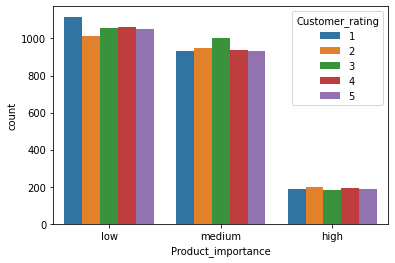

In [ ]:
# To plot Product Importance (Low, Medium, High) versus Customer Rating [from 1 (Worst) to 5 (Best)]
sns.countplot(x='Product_importance',
              data=df, hue='Customer_rating')

plt.show()

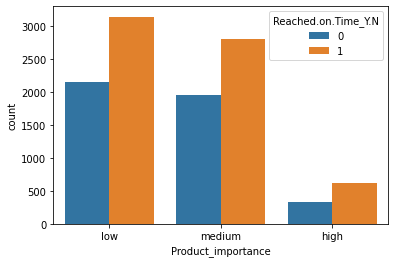

In [ ]:
# To plot Product Importance (Low, Medium, High) versus Reached.on.Time_Y.N (where 1=product has NOT reached on time; 0=product has reached on time)
sns.countplot(x='Product_importance',
              data=df, hue='Reached.on.Time_Y.N')

plt.show()

Based on the barplots above, high product importance does not affect customer rating. However, when product importance is high, the products have not reached on time. 

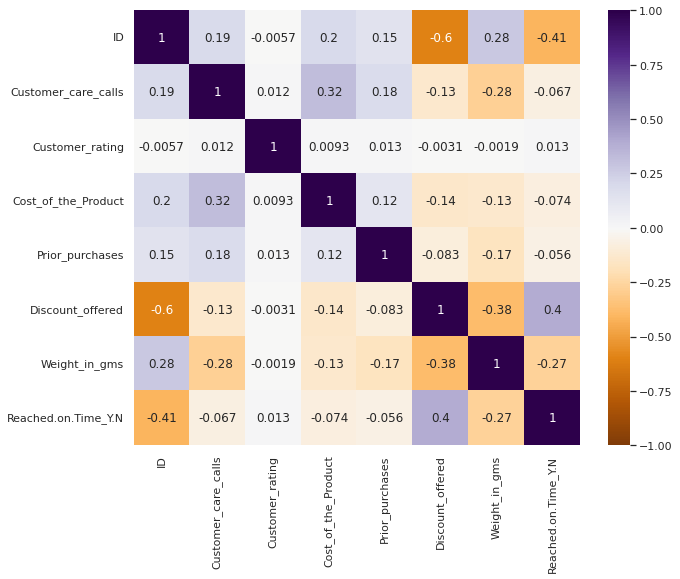

In [ ]:
sns.set(rc = {'figure.figsize': (10, 8)})
sns.heatmap(df.corr(), cmap = 'PuOr', annot = True, vmin = -1, vmax = 1, center = 0);
# annot = True -> label heatmap with correlation number
# center=0 -> white colour at the centre

### **Split the Data into Dependent and Indepedent Variables**

In [ ]:
## Make a new copy of columns used to make predictions (ie. x)
X = df.drop('Reached.on.Time_Y.N', axis=1).copy() 
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
1,2,F,Flight,4,5,216,2,low,M,59,3088
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484


In [ ]:
# Make a new copy of the column of data we want to predict
y = df['Reached.on.Time_Y.N'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### **Encode the categorical variables**

If perform the encoding **before** the split, it will lead to data leakage (train-test contamination) In the sense, it will introduce new data (integers of Label Encoders) and use it for the models thus it will affect the end predictions results (good validation scores but poor in deployment).

After the train and validation data category already matched up, we can perform fit_transform on the train data, then only transform for the validation data - based on the encoding maps from train data.

Almost all feature engineering like standarisation, Normalisation etc should be done after train testsplit. 

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.8 MB/s 


In [ ]:
import category_encoders as ce # for category encoders

# Encode the categorical variables
# We convert the categorical features to numerical through the leave one out encoder in categorical_encoders. 
# This leaves a single numeric feature in the place of each existing categorical feature. This is needed to apply the scaler to all features in the training data.
encoder = ce.LeaveOneOutEncoder(return_df=True)

X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.shape

(8249, 11)

### **Standardisation of Data**

In [ ]:
# apply robust scaler 
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded, y_train)
X_train_scaled.shape

(8249, 11)

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
count,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000,8249.000000
mean,-0.001095,-0.370139,-2.223715,0.029398,-0.008001,-0.038643,0.573767,2.091365,0.464531,1.101022,-0.159367
std,0.577631,0.580014,4.846758,0.570621,0.706075,0.598125,1.510124,8.197789,0.500686,2.735689,0.508513
min,-0.996549,-1.310647,-13.468227,-1.000000,-1.000000,-1.462500,-1.000000,-0.886318,-0.046972,-1.000000,-0.973358
25%,-0.502634,-0.964639,-0.903108,-0.500000,-0.500000,-0.537500,0.000000,-0.886318,-0.046972,-0.500000,-0.714684
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.497366,0.035361,0.096892,0.500000,0.500000,0.462500,1.000000,0.113682,0.953028,0.500000,0.285316
max,1.001090,0.420114,0.096892,1.500000,1.000000,1.212500,7.000000,29.102542,1.001446,9.666667,1.147150


In [ ]:
X_test_scaled = scaler.transform(X_test_encoded)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,0.012728,-0.372653,-2.213060,0.020727,0.005091,-0.024232,0.549091,2.080776,0.478294,0.945758,-0.152610
std,0.574280,0.575807,4.832840,0.571169,0.709015,0.608699,1.560572,8.175804,0.500221,2.590833,0.500968
min,-0.994914,-1.281398,-13.295478,-1.000000,-1.000000,-1.462500,-1.000000,-0.844946,-0.028057,-1.000000,-0.973358
25%,-0.476975,-0.936450,-0.740355,-0.500000,-0.500000,-0.550000,-1.000000,-0.844946,-0.028057,-0.500000,-0.708333
50%,0.010082,-0.411852,0.038369,0.000000,0.000000,0.062500,0.000000,0.046067,0.972278,0.000000,0.007900
75%,0.512035,0.014011,0.038369,0.500000,0.500000,0.487500,1.000000,0.046067,0.972278,0.500000,0.268820
max,1.001272,0.377383,0.038369,1.500000,1.000000,1.212500,7.000000,28.724135,0.972278,9.666667,0.765489


### **Classification Models**

1) KNN

2) Logistics Regression

3) Support Vector Machine

4) Decision Tree

=====

**KNN**

=====

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_df, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_scaled_df)

In [ ]:
knn.score(X_test_scaled_df, y_test)

0.6418181818181818

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 674  461]
 [ 524 1091]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1135
           1       0.70      0.68      0.69      1615

    accuracy                           0.64      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.65      0.64      0.64      2750



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 100)}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)

gridsearch.fit(X_train_scaled_df, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 91}

In [ ]:
y_pred = gridsearch.predict(X_test_scaled_df)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[890 245]
 [674 941]]
              precision    recall  f1-score   support

           0       0.57      0.78      0.66      1135
           1       0.79      0.58      0.67      1615

    accuracy                           0.67      2750
   macro avg       0.68      0.68      0.67      2750
weighted avg       0.70      0.67      0.67      2750



In [ ]:
GD = GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},cv=5)

In [ ]:
GD.fit(X_train_scaled_df, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']})

In [ ]:
y_pred = GD.predict(X_test_scaled_df)

In [ ]:
GD.best_params_

{'n_neighbors': 22, 'weights': 'distance'}

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 801  334]
 [ 584 1031]]
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1135
           1       0.76      0.64      0.69      1615

    accuracy                           0.67      2750
   macro avg       0.67      0.67      0.66      2750
weighted avg       0.68      0.67      0.67      2750



==================

**Logistics Regression**

==================

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled_df, y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test_scaled_df)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[ 691  444]
 [ 529 1086]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1135
           1       0.71      0.67      0.69      1615

    accuracy                           0.65      2750
   macro avg       0.64      0.64      0.64      2750
weighted avg       0.65      0.65      0.65      2750



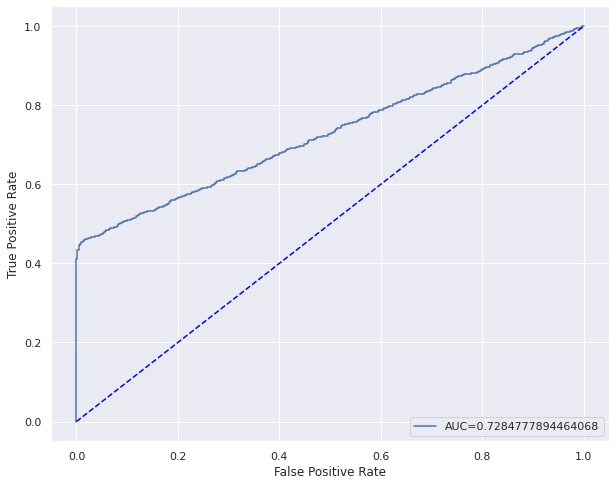

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

#define metrics
y_pred_proba = logreg.predict_proba(X_test_scaled_df)[:,1]
fpr1, tpr1, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1) 

#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

plt.show()

=====================

**Support Vector Machine**

====================

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(X_train_scaled_df, y_train)

SVC()

In [ ]:
model.score(X_test_scaled_df, y_test)

0.6629090909090909

============

**Decision Tree**

============


In [ ]:
# Import library
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree 

# Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train_scaled_df, y_train)


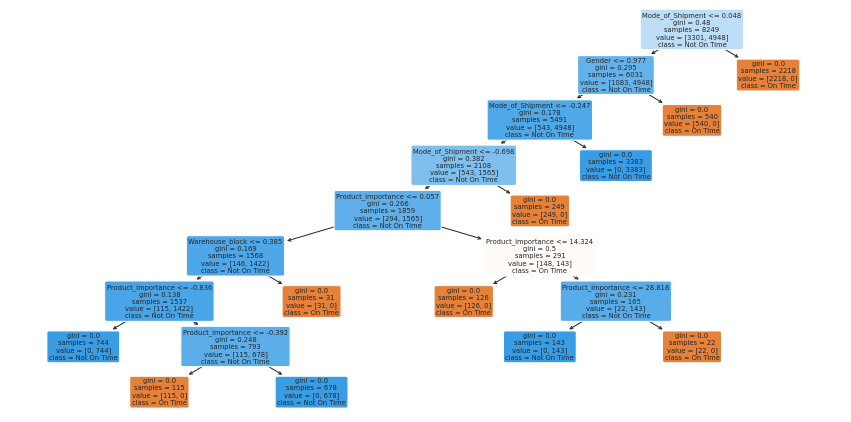

In [ ]:
# plot decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["On Time", "Not On Time"],
          feature_names= X.columns);

In [ ]:
y_pred = clf_dt.predict(X_test_scaled_df)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[   0 1135]
 [   0 1615]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.59      1.00      0.74      1615

    accuracy                           0.59      2750
   macro avg       0.29      0.50      0.37      2750
weighted avg       0.34      0.59      0.43      2750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


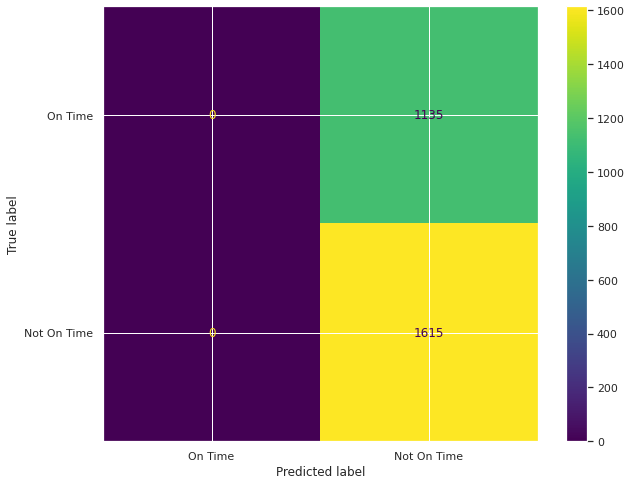

In [ ]:
# plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix. 
plot_confusion_matrix(clf_dt, X_test_scaled_df, y_test, display_labels=["On Time", "Not On Time"])

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=5, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train_scaled_df, y_train)
bag_model.oob_score_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9689659352648806

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=5), X_train_scaled_df, y_train, cv=5)
scores.mean()

1.0